# Деревья решений

# Содержание работы

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Text(0, 0.5, 'X2')

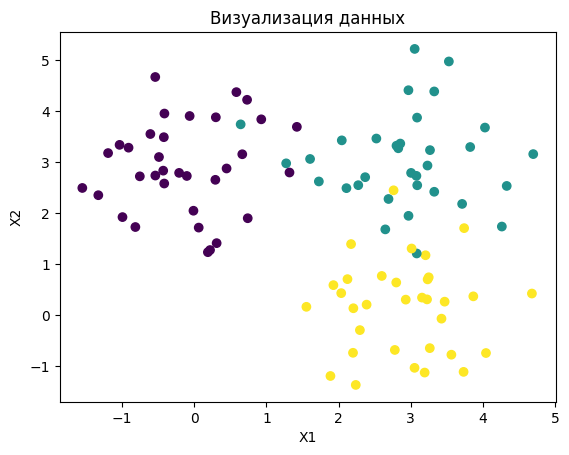

In [3]:
from sklearn.datasets import make_blobs

RANDOM_SEED = 42
X, y = make_blobs(n_samples=100, centers=[(0,3),(3,3),(3,0)], 
                                      n_features=2, random_state=RANDOM_SEED,
                                      cluster_std=(0.9,0.9,0.9))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Визуализация данных')
plt.xlabel('X1')
plt.ylabel('X2')

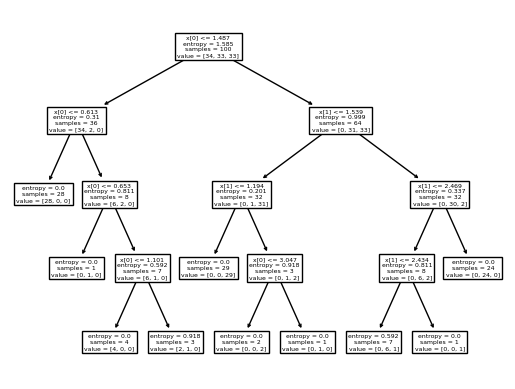

In [4]:
from sklearn.tree import DecisionTreeClassifier, plot_tree


depth=4
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=depth, 
                                  random_state=RANDOM_SEED)
clf_tree.fit(X, y)

plot_tree(clf_tree) 
plt.show()

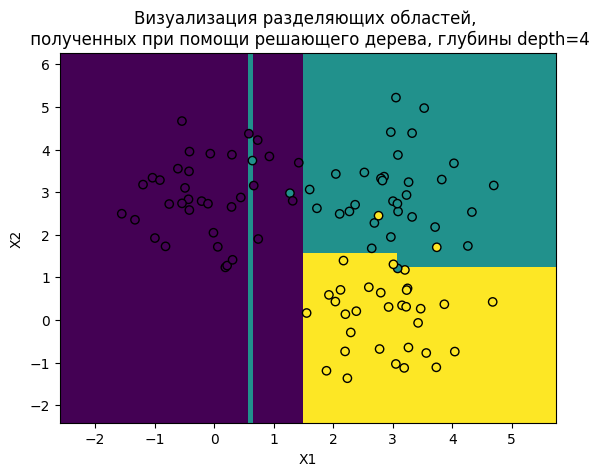

In [5]:
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf_tree.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)

plt.title('Визуализация разделяющих областей, \n полученных при помощи решающего дерева, глубины depth={}'.format(depth))
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score


y_pred = clf_tree.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy =', accuracy_score(y, y_pred))
print('F1_score =', f1_score(y, y_pred, average='micro'))

[[34  0  0]
 [ 1 32  0]
 [ 0  1 32]]
Accuracy = 0.98
F1_score = 0.98


In [7]:
observation_new = [[2, 1]]
clf_tree.predict(observation_new)

array([2])

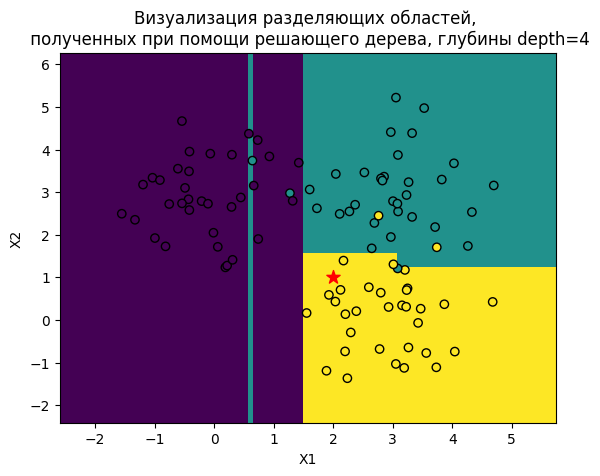

In [8]:
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf_tree.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', s=100, color='r')

plt.title('Визуализация разделяющих областей, \n полученных при помощи решающего дерева, глубины depth={}'.format(depth))
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

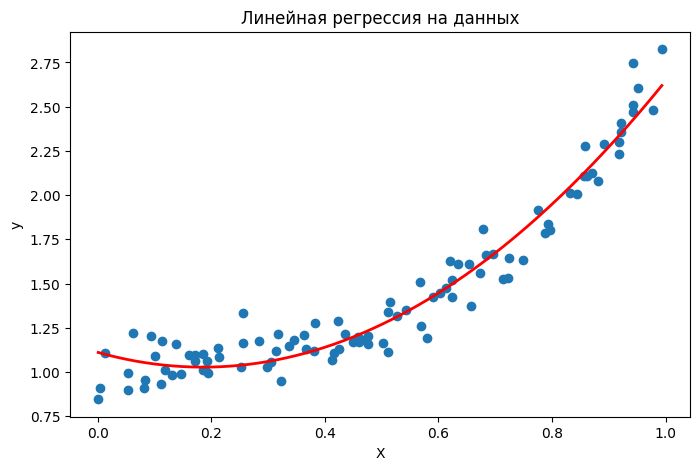

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Данные
n_samples = 100
X = np.sort(np.random.rand(n_samples))
y = np.exp(X ** 2) + np.random.normal(0.0, 0.1, X.shape[0])

# Модель
X = pd.DataFrame(X)

transformation = PolynomialFeatures(degree=2)
transformation.fit(X)
X_2 = transformation.transform(X)

poly_2d = LinearRegression().fit(X_2, y)

xx = np.linspace(X.min().values[0], X.max().values[0], 300).reshape(-1, 1)
xx_2d = transformation.transform(pd.DataFrame(xx))


# Предсказания на более плотной сетке

yy = poly_2d.predict(xx_2d)

# Визуализация
plt.figure(figsize=(8, 5))
plt.scatter(X, y)
plt.plot(xx, yy, color='red', linewidth=2, label='Линейная регрессия')
plt.title('Линейная регрессия на данных')
plt.xlabel('X')
plt.ylabel('y')
plt.show()


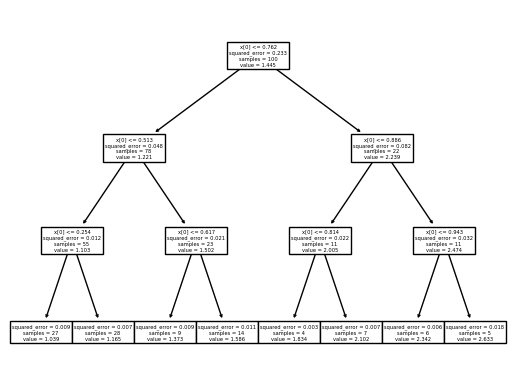

In [10]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

depth=3
reg_tree = DecisionTreeRegressor(max_depth=depth, random_state=RANDOM_SEED)
reg_tree.fit(X, y)

plot_tree(reg_tree)
plt.show()

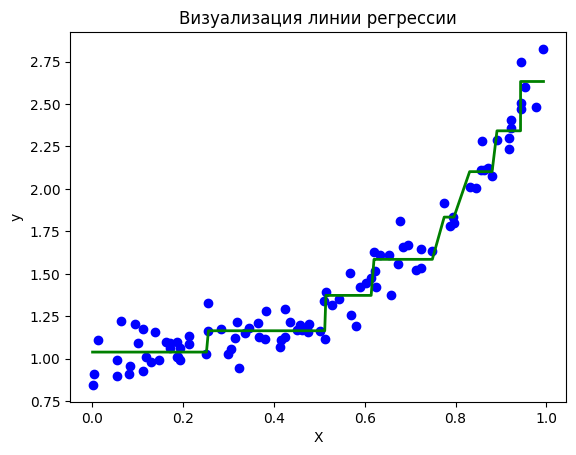

In [11]:
y_pred_reg = reg_tree.predict(X)

plt.scatter(X, y, c="b")

plt.plot(X, y_pred_reg, "g", lw=2)

plt.title('Визуализация линии регрессии')
plt.xlabel('X')
plt.ylabel('y');

In [12]:
from sklearn.metrics import r2_score, mean_squared_error


print('r2= ', r2_score(y, y_pred_reg))
print('MSE= ', mean_squared_error(y, y_pred_reg))

r2=  0.9627522510297418
MSE=  0.008692126071694173


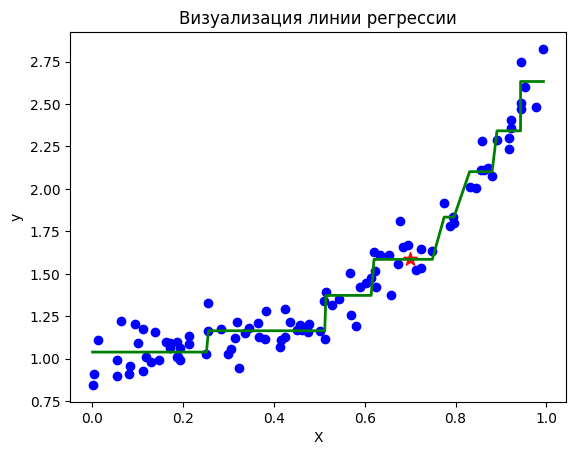

In [13]:
observation_new = [[0.7]]

y_pred_reg = reg_tree.predict(X)
y_pred_reg_obs_new = reg_tree.predict(observation_new)
plt.scatter(X, y, c="b")
plt.scatter(observation_new[0][0], y_pred_reg_obs_new, marker='*', s=100, color='r')
plt.plot(X, y_pred_reg, "g", lw=2)

plt.title('Визуализация линии регрессии')
plt.xlabel('X')
plt.ylabel('y');

# Задания для самостоятельного выполнения

### 1. Загрузите встроенные данные sklearn.datasets.load_iris, взяв только последние два столбца (длина и ширина лепестков). Изобразите их на диаграмме рассеяния, подкрасив каждый класс некоторым цветом.

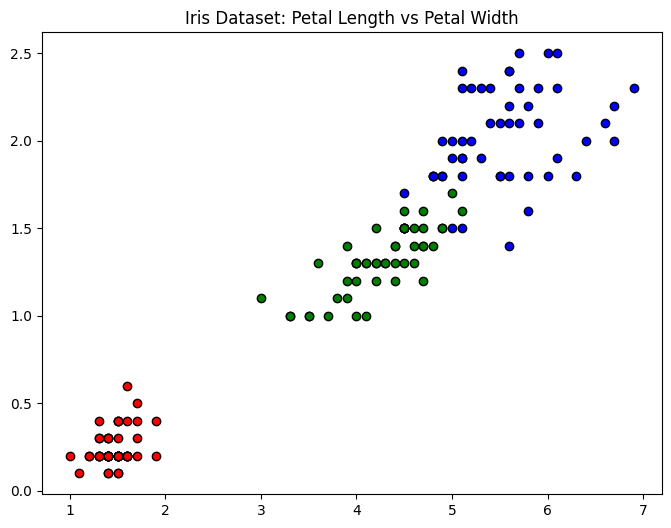

In [14]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

# Загрузка данных
iris = load_iris()
X = iris.data[:, -2:]  # Берем только длину и ширину лепестков
y = iris.target

# Создание DataFrame для удобства
df = pd.DataFrame(X, columns=['Petal Length', 'Petal Width'])
df['Target'] = y

# Цвета для каждого класса
colors = ['red', 'green', 'blue']

# Построение диаграммы рассеяния
plt.figure(figsize=(8, 6))
for i in range(3):
    subset = df[df['Target'] == i]
    plt.scatter(subset['Petal Length'], subset['Petal Width'],
                color=colors[i], edgecolor='black')

plt.title('Iris Dataset: Petal Length vs Petal Width')
plt.show()


### 2. Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier глубины 4, используя энтропию. Визуализируйте соответствующий граф дерева принятия решений.

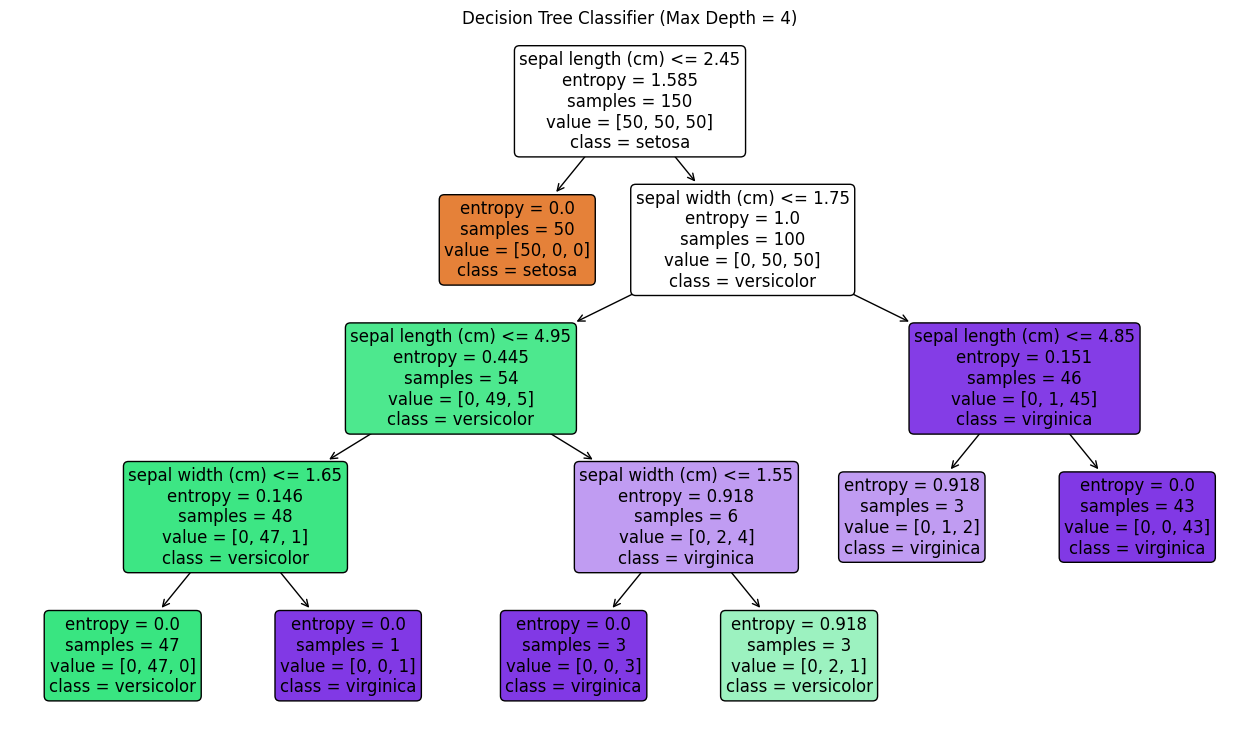

In [15]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree


clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
clf.fit(X, y)

# Визуализация дерева решений
plt.figure(figsize=(16, 9))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, rounded=True, fontsize=12)
plt.title('Decision Tree Classifier (Max Depth = 4)')
plt.show()

### 3. Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier с разными глубинами (1, 2, 3, 4, 10), используя энтропию, и визуализируйте в каждом случае полученные разделяющие области.

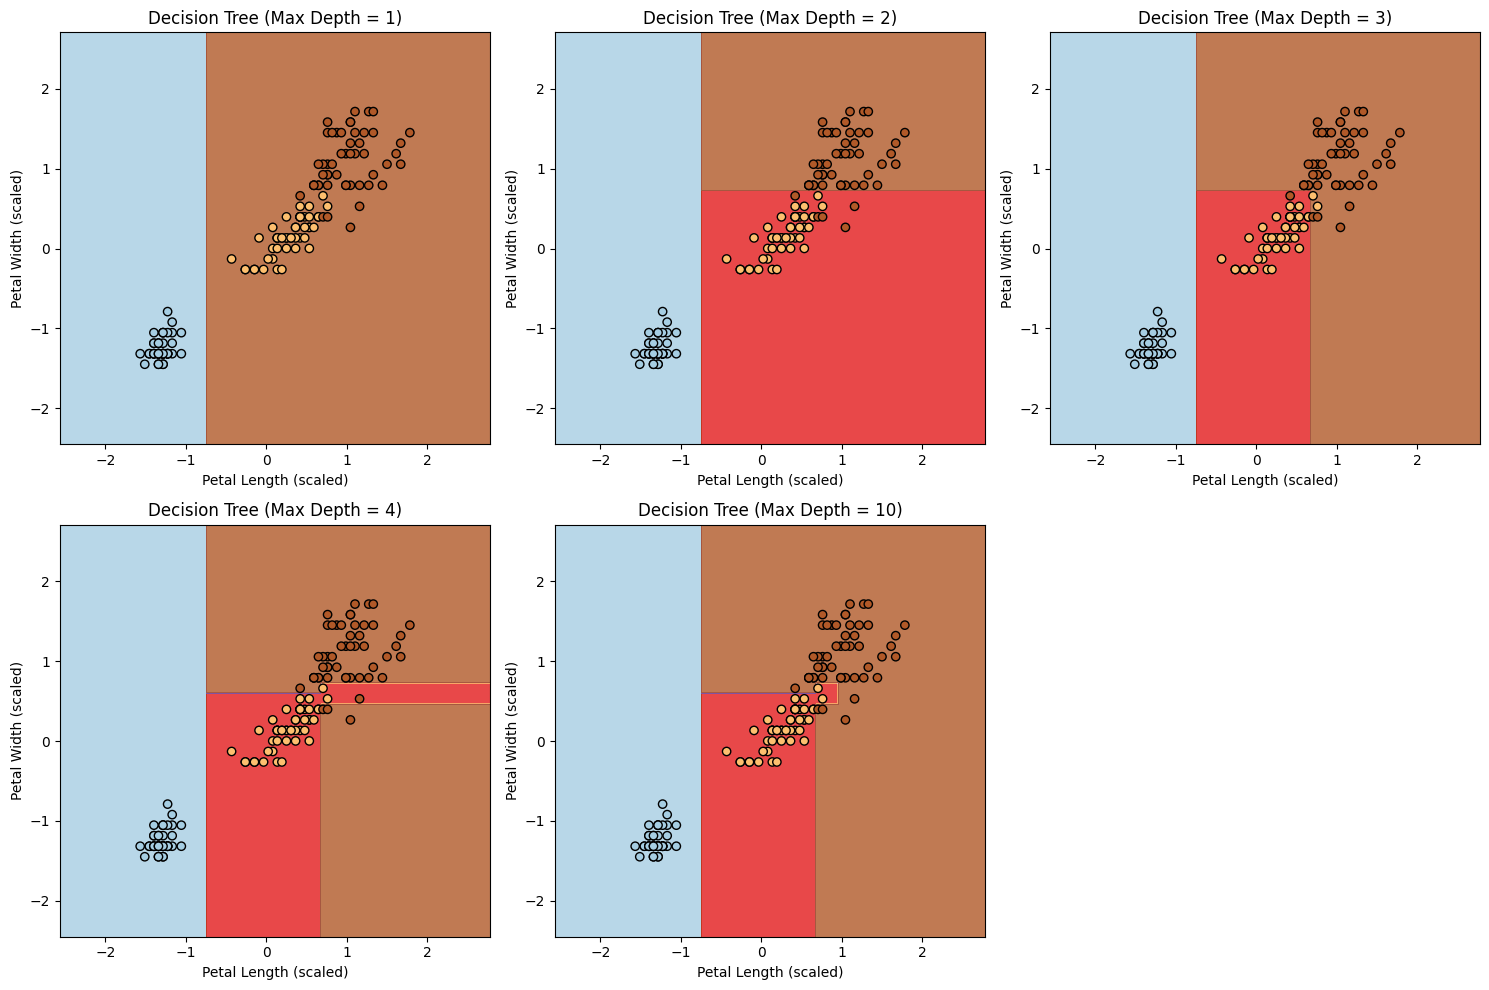

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))


depths = [1, 2, 3, 4, 10]
plt.figure(figsize=(15, 10))

for i, depth in enumerate(depths, 1):
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
    clf.fit(X_scaled, y)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(2, 3, i)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolor='k', marker='o', cmap=plt.cm.Paired)
    plt.title(f'Decision Tree (Max Depth = {depth})')
    plt.xlabel('Petal Length (scaled)')
    plt.ylabel('Petal Width (scaled)')

plt.tight_layout()
plt.show()


### 4. Выведите необходимые метрики для оценки работы моделей с разными глубинами. Сделайте вывод о том, какая модель лучше классифицирует данные.

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))


depths = [1, 2, 3, 4, 10]
results = {}
for i, depth in enumerate(depths, 1):
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
    clf.fit(X_scaled, y)

    # Предсказания для реальных данных
    y_pred = clf.predict(X_scaled)

    # Предсказания для сетки для визуализации
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Метрики
    acc = accuracy_score(y, y_pred)
    cm = confusion_matrix(y, y_pred)
    report = classification_report(y, y_pred, target_names=iris.target_names, zero_division=0)

    results[depth] = {
        'accuracy': acc,
        'confusion_matrix': cm,
        'classification_report': report
    }

for depth, result in results.items():
    print(f"--- Глубина дерева: {depth} ---")
    print(f"Точность: {result['accuracy']:.4f}")
    print("Матрица ошибок:\n", result['confusion_matrix'])
    print("Отчет по классификации:\n", result['classification_report'])
    print("-" * 50)

--- Глубина дерева: 1 ---
Точность: 0.6667
Матрица ошибок:
 [[50  0  0]
 [ 0 50  0]
 [ 0 50  0]]
Отчет по классификации:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.50      1.00      0.67        50
   virginica       0.00      0.00      0.00        50

    accuracy                           0.67       150
   macro avg       0.50      0.67      0.56       150
weighted avg       0.50      0.67      0.56       150

--------------------------------------------------
--- Глубина дерева: 2 ---
Точность: 0.9600
Матрица ошибок:
 [[50  0  0]
 [ 0 49  1]
 [ 0  5 45]]
Отчет по классификации:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.91      0.98      0.94        50
   virginica       0.98      0.90      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       15

Лучше всего классифицирует данные модель с глубиной 10

### 5. Загрузите весь датасет load_iris. Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier глубины 4, используя энтропию. Визуализируйте соответствующий граф дерева решений. Оцените качество работы модели.

Accuracy: 0.8889
Confusion Matrix:
[[15  0  0]
 [ 0 13  2]
 [ 0  3 12]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.81      0.87      0.84        15
   virginica       0.86      0.80      0.83        15

    accuracy                           0.89        45
   macro avg       0.89      0.89      0.89        45
weighted avg       0.89      0.89      0.89        45



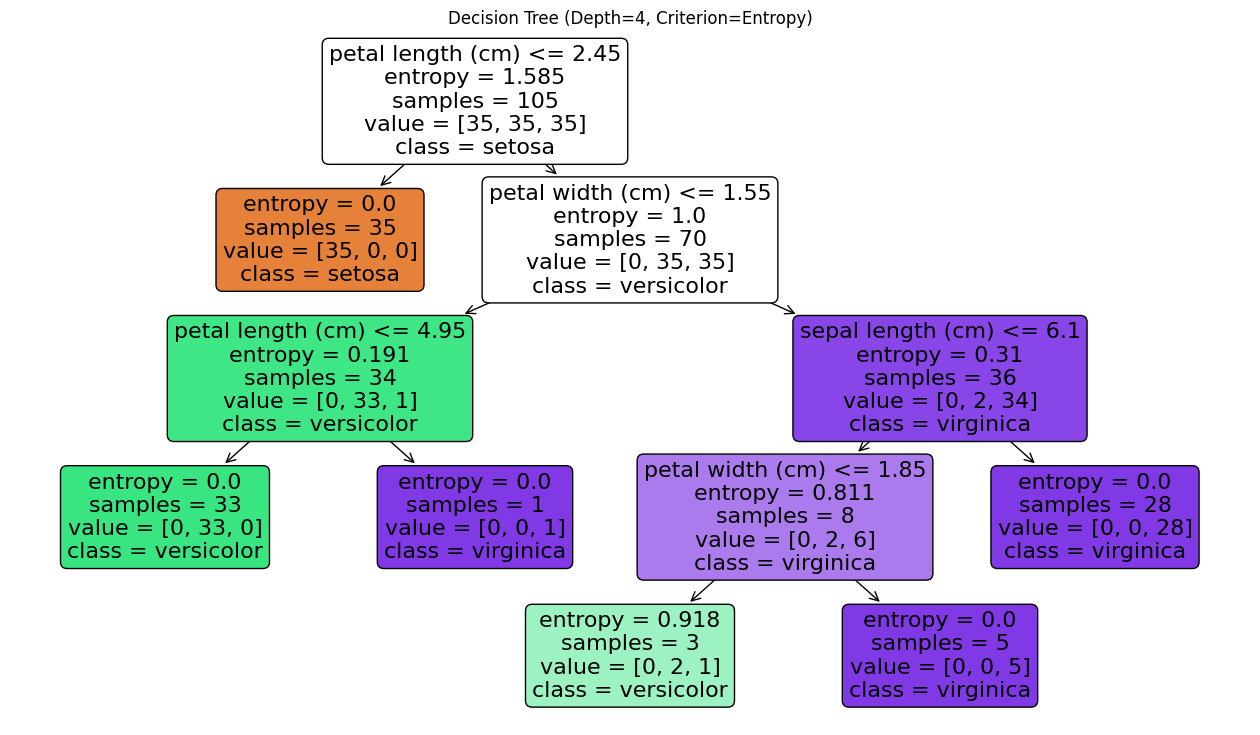

In [18]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=iris.target_names, zero_division=0)

print(f"Accuracy: {acc:.4f}")
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(report)

plt.figure(figsize=(16, 9))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
plt.title("Decision Tree (Depth=4, Criterion=Entropy)")
plt.show()

### 6. Загрузите встроенные данные sklearn.datasets.california_housing, взяв только столбец AveBedrms в качестве единственного признака. Изобразите данные на диаграмме рассеяния так, чтобы на одной оси были отмечены значения признака, а на другой - целевой переменной.

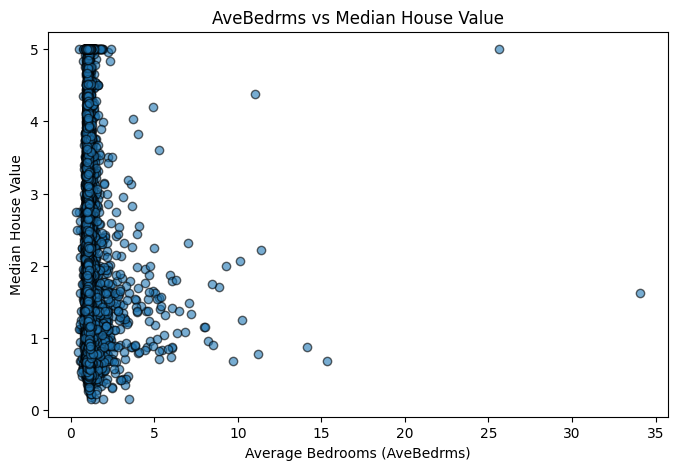

In [19]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target

X_avebedrms = X['AveBedrms']

plt.figure(figsize=(8, 5))
plt.scatter(X_avebedrms, y, alpha=0.6, edgecolor='k')
plt.xlabel('Average Bedrooms (AveBedrms)')
plt.ylabel('Median House Value')
plt.title('AveBedrms vs Median House Value')
plt.show()

### 7. Обучите модель регрессионного дерева принятия решений sklearn.tree.DecisionTreeRegressor, зафиксировав random_state=0, а остальными гиперпараметрами по умолчению.

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor, plot_tree

california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target

X_avebedrms = X['AveBedrms']

# Преобразуем признак в правильную форму
X_feature = X_avebedrms.values.reshape(-1, 1)

# Обучение модели
reg_tree = DecisionTreeRegressor(random_state=0)
reg_tree.fit(X_feature, y)

DecisionTreeRegressor(random_state=0)

### 8. Визуализируйте соответствующий граф дерева решений и получившуюся кусочную линию регрессии.

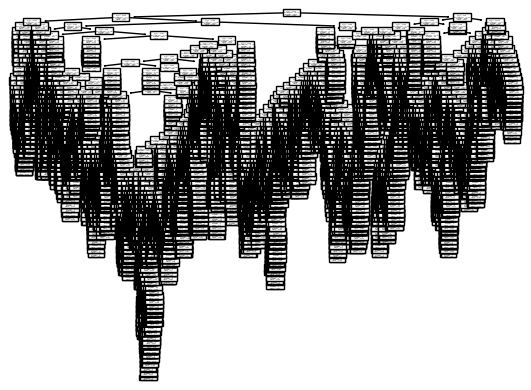

In [26]:
plot_tree(reg_tree)
plt.show()

Дерево получается слишком большим из за то что глубина не была ограничена

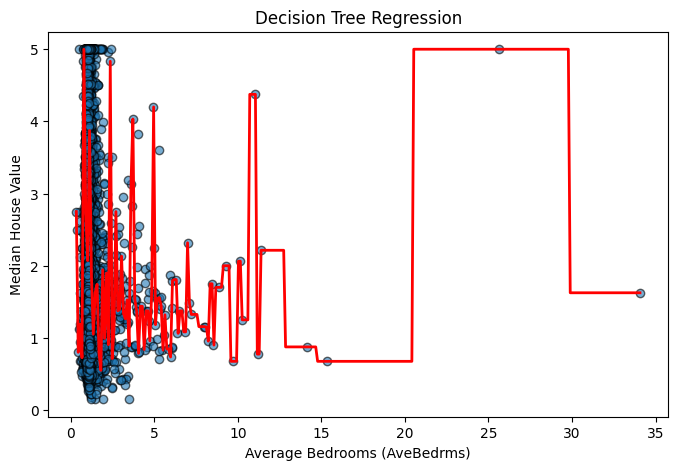

In [23]:
# Визуализация кусочной линии регрессии
X_test = np.linspace(X_feature.min(), X_feature.max(), 300).reshape(-1, 1)
y_pred = reg_tree.predict(X_test)

plt.figure(figsize=(8, 5))
plt.scatter(X_avebedrms, y, alpha=0.6, edgecolor='k')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Average Bedrooms (AveBedrms)')
plt.ylabel('Median House Value')
plt.title('Decision Tree Regression')
plt.show()

Модель слишком точно аппроксимирует данные. Такая переобученная модель будет плохо справляться с новыми данными

### 9. Оцените качество работы модели. Создайте новое наблюдение и сделайте предсказание на нём.

In [38]:
from sklearn.metrics import mean_squared_error, r2_score


y_pred = reg_tree.predict(X_feature)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'Среднеквадратичная ошибка (MSE): {mse:.4f}')
print(f'Коэффициент детерминации (R2): {r2:.4f}')

new_observation = np.array([[1.1]])
prediction = reg_tree.predict(new_observation)
print(f'Предсказание для нового наблюдения {new_observation.flatten()[0]}: {prediction[0]:.4f}')

Среднеквадратичная ошибка (MSE): 0.4272
Коэффициент детерминации (R2): 0.6792
Предсказание для нового наблюдения 1.1: 1.9687


### 10. Загрузите весь датасет fetch_california_housing. Обучите ту же модель. Визуализируйте соответствующий граф дерева решений и оцените качество работы модели.

In [41]:
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree

data = fetch_california_housing()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = DecisionTreeRegressor(random_state=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

Mean Squared Error: 0.5444
R^2 Score: 0.5853


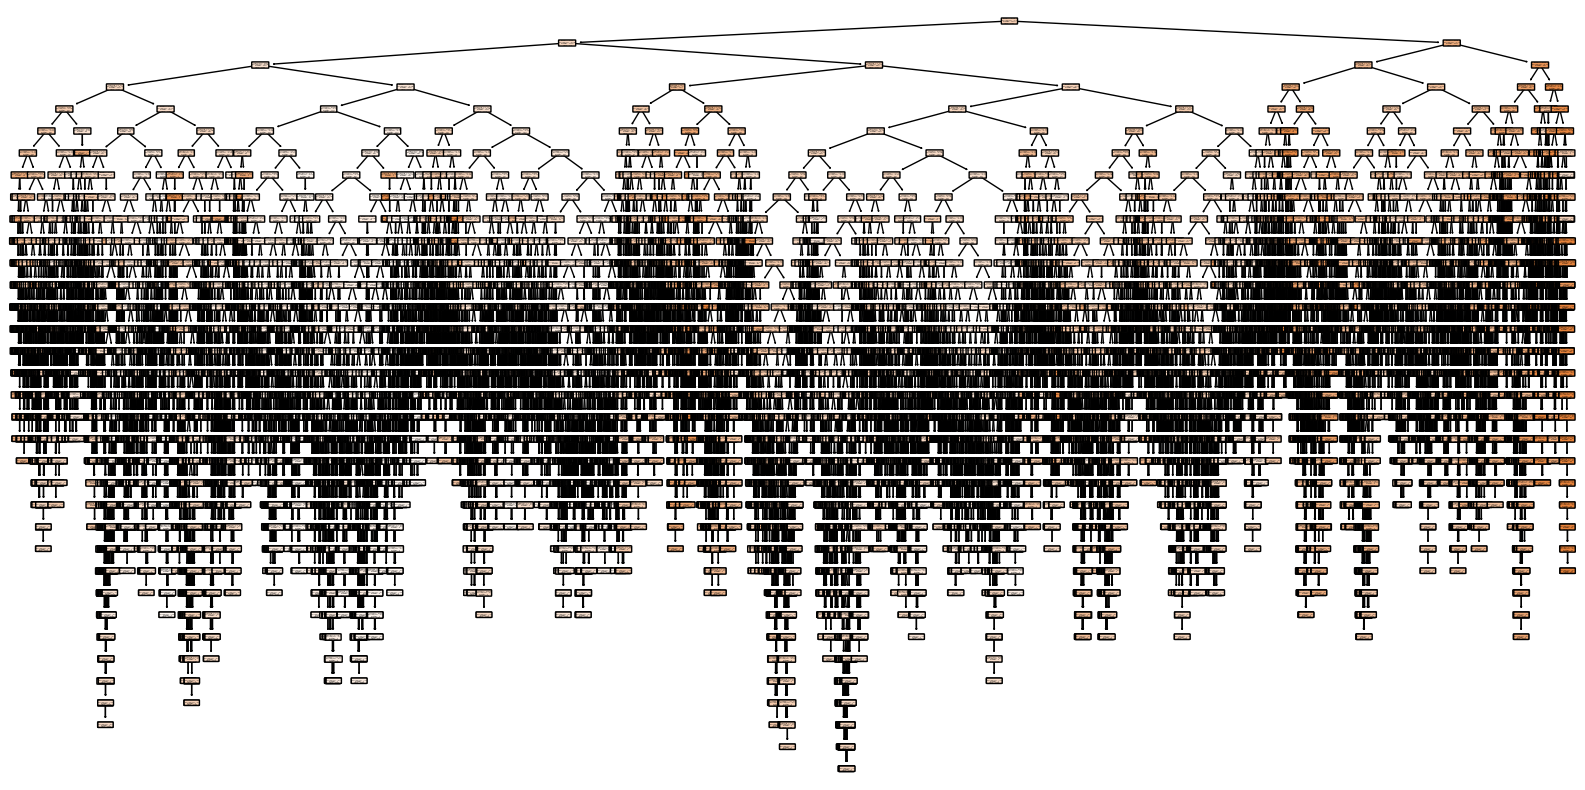

In [42]:
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=data.feature_names, rounded=True)
plt.show()

# Контрольные вопросы

### Почему граница принятия решений у деревьев решений имеет такую характерную форму?
- Деревья решений делят пространство признаков прямыми линиями, перпендикулярными осям признаков. 
- Поэтому границы всегда "ступенчатые" и ориентированы по осям.

### Как глубина дерева влияет на сложность модели?
- Чем глубже дерево, тем более сложные зависимости оно может моделировать.
- Слишком глубокое дерево может переобучаться, слишком мелкое — недообучаться.

### Почему глубина дерева на разных ветках может быть разная?
- Дерево строится жадно: некоторые ветки могут достичь "чистых" листьев (один класс) быстрее.
- Поэтому в одних ветках дерево заканчивается раньше, чем в других.

### Что такое критерий в деревьях решений и как он влияет на работу модели?
- Критерий (например, "энтропия", "gini") определяет, как измеряется качество разбиения данных на каждом шаге.
- Выбор критерия влияет на то, какие разбиения будут выбраны и, следовательно, на структуру и качество дерева.
